## Customer Personality Analysis 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
df = pd.read_excel("S:/Excelr/Data Science/projects/marketing_campaign.xlsx")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


### Basic Understanding

In [5]:
print("Shape:", df.shape)

Shape: (2240, 29)


In [6]:
print("\nColumns:\n", df.columns)


Columns:
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [7]:
print("Info:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [8]:
#Summary
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


### Handle Missing Values

In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
# Handling Missing Values
df['Income'] = df['Income'].fillna(df['Income'].median())

In [11]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
df.duplicated().sum()

0

### Feature Engineering

In [13]:
#Create Useful Feature
df['Total_Kids'] = df['Kidhome'] + df['Teenhome']

In [14]:
# Total Spending across categories
df['Total_Spend'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + 
                     df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

In [15]:
# Enrollment year extract
df['Customer_Year'] = pd.to_datetime(df['Dt_Customer']).dt.year

In [16]:
#  Categorical & Numerical Split
categorical_cols = ['Education', 'Marital_Status', 'Complain']
numerical_cols = ['Year_Birth', 'Income', 'Recency', 'Total_Kids', 'Total_Spend']

In [17]:
# Combine purchase channels to reduce redundancy
df['Total_Purchases'] = (
    df['NumWebPurchases'] +
    df['NumCatalogPurchases'] +
    df['NumStorePurchases']
)

### Distribution Plots (Numerical)

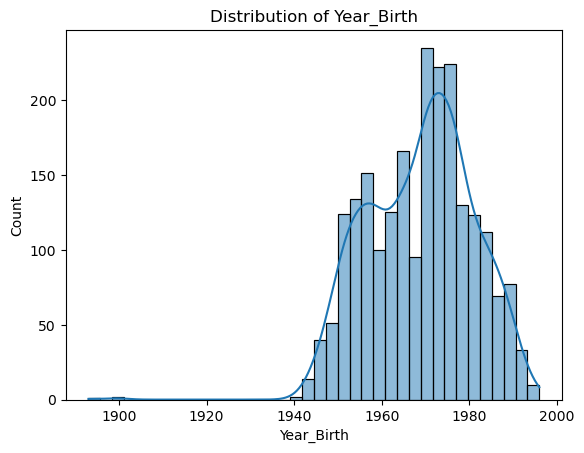

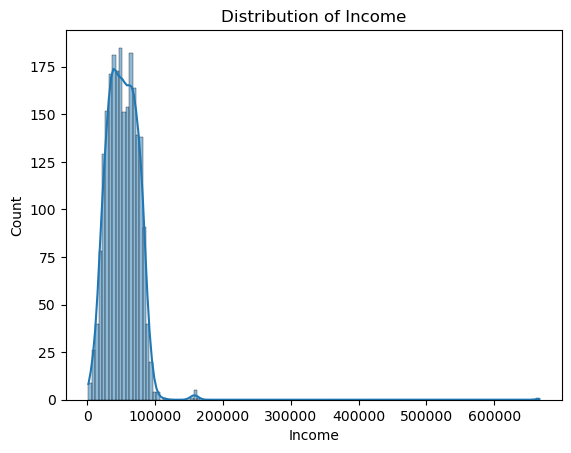

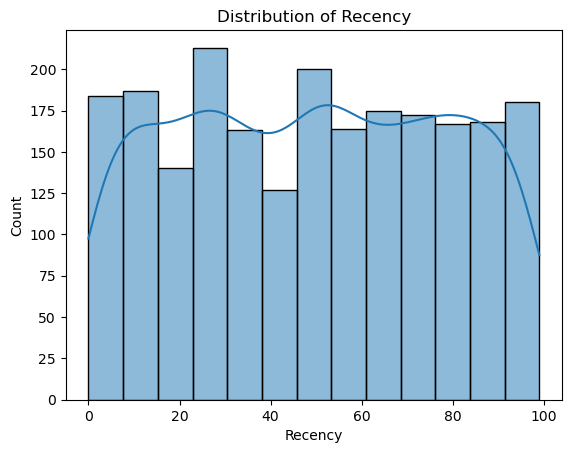

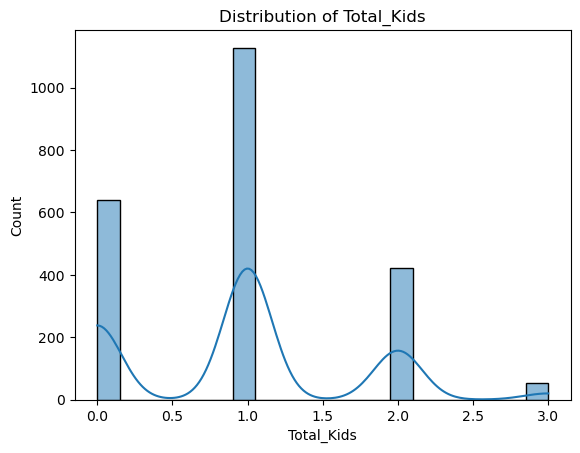

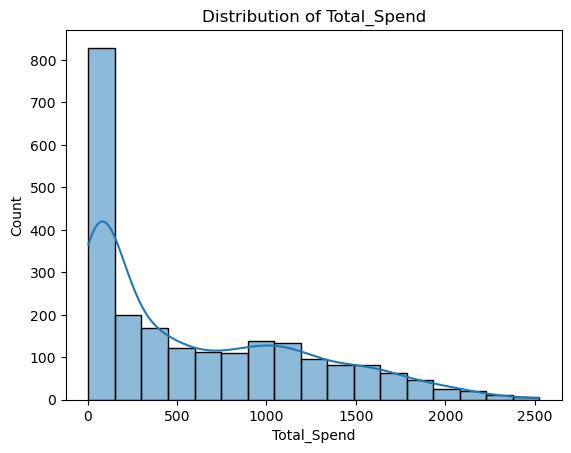

In [18]:
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### Boxplots (Outlier Check)

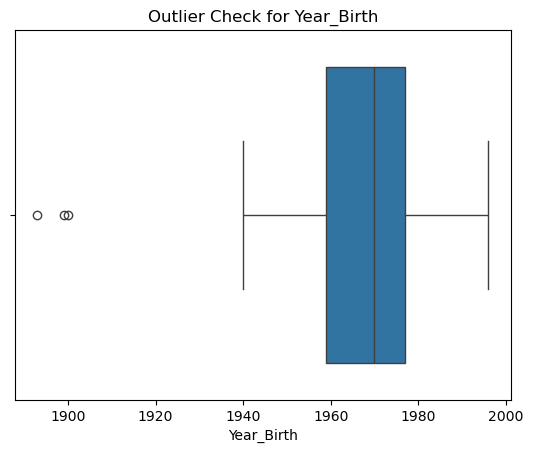

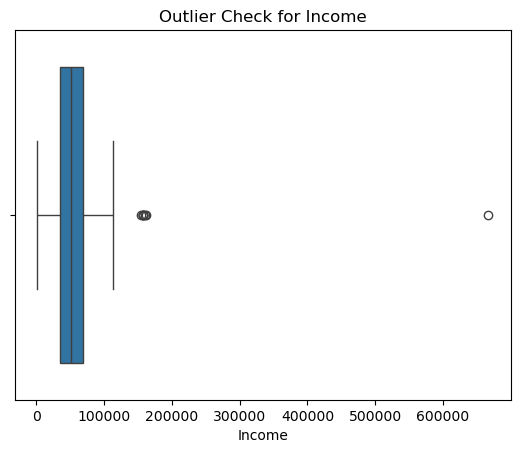

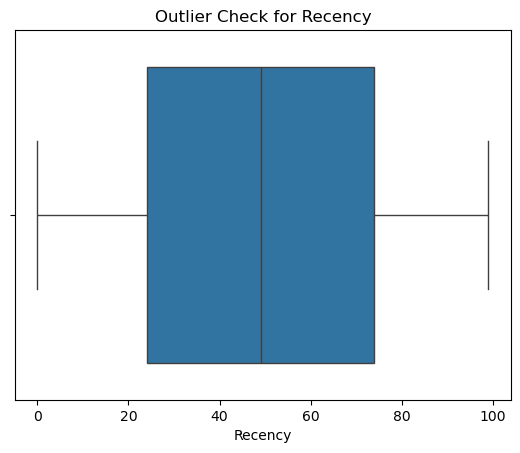

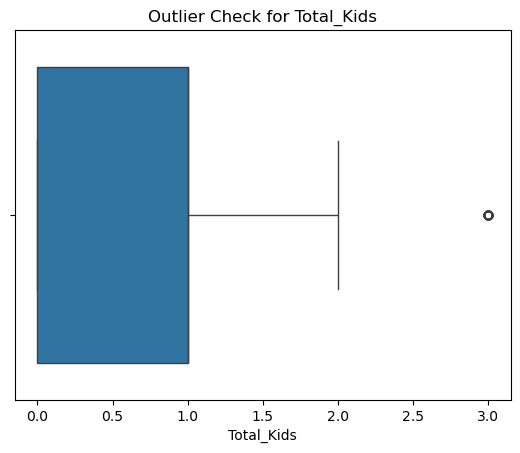

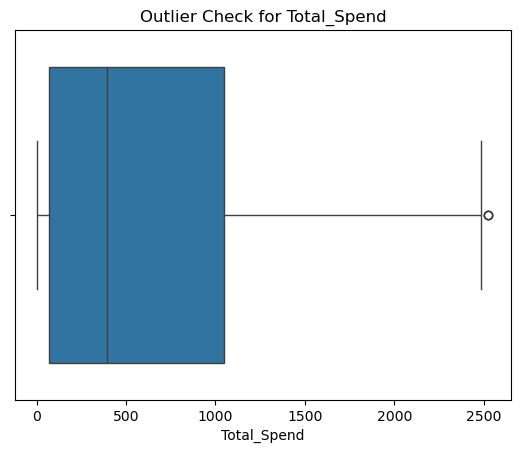

In [19]:
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Outlier Check for {col}')
    plt.show()

In [20]:
# Handling outliers using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

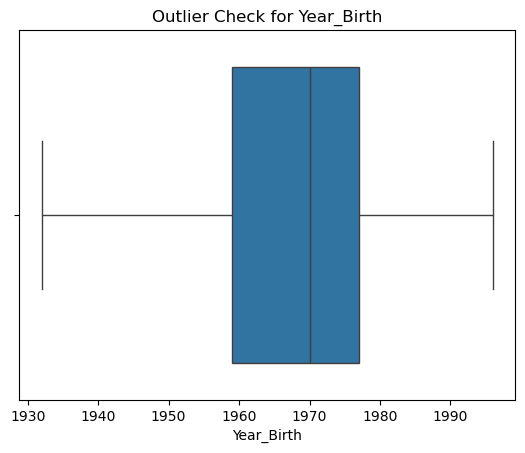

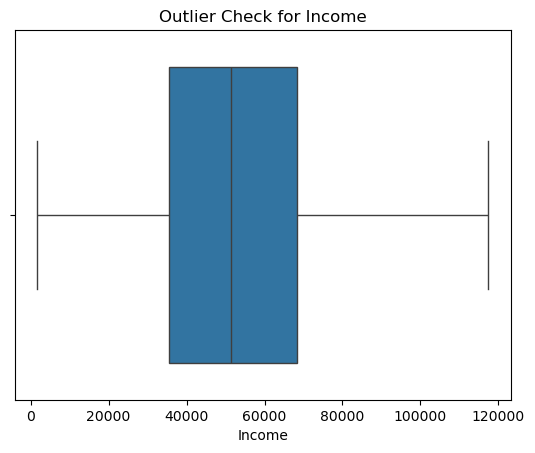

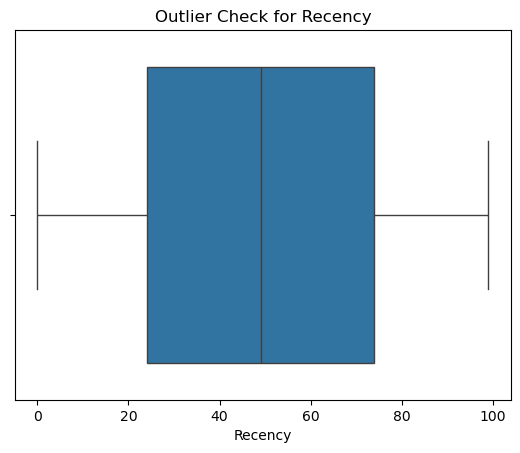

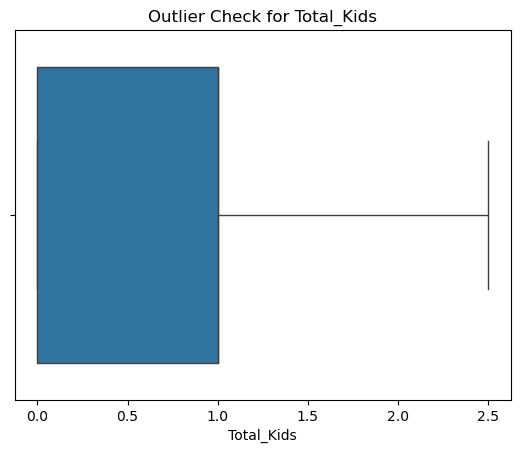

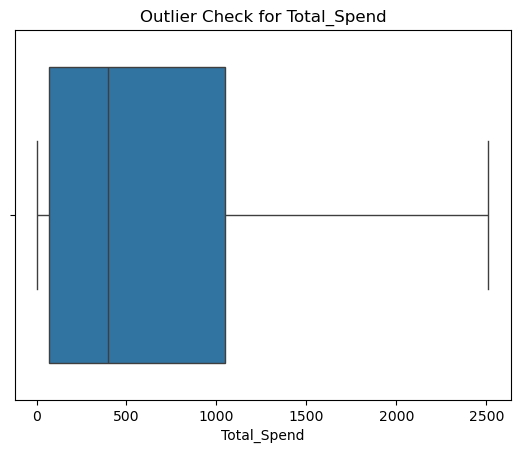

In [21]:
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Outlier Check for {col}')
    plt.show()

### Countplots (Categorical)

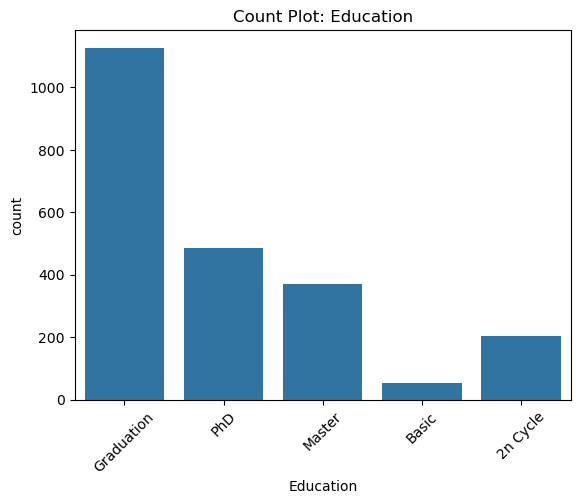

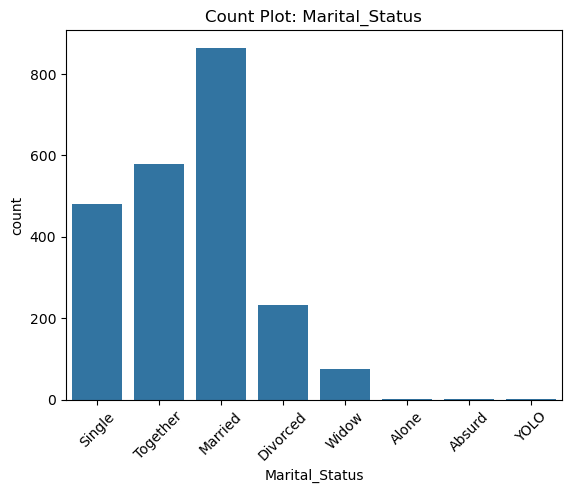

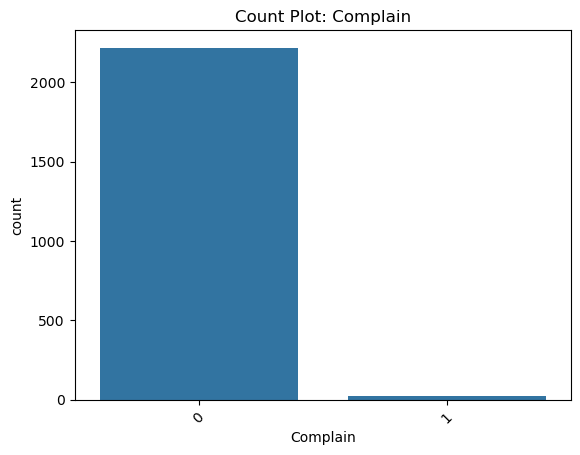

In [22]:
for col in categorical_cols:
    plt.figure()
    sns.countplot(x=df[col])
    plt.title(f'Count Plot: {col}')
    plt.xticks(rotation=45)
    plt.show()

### Spending Analysis

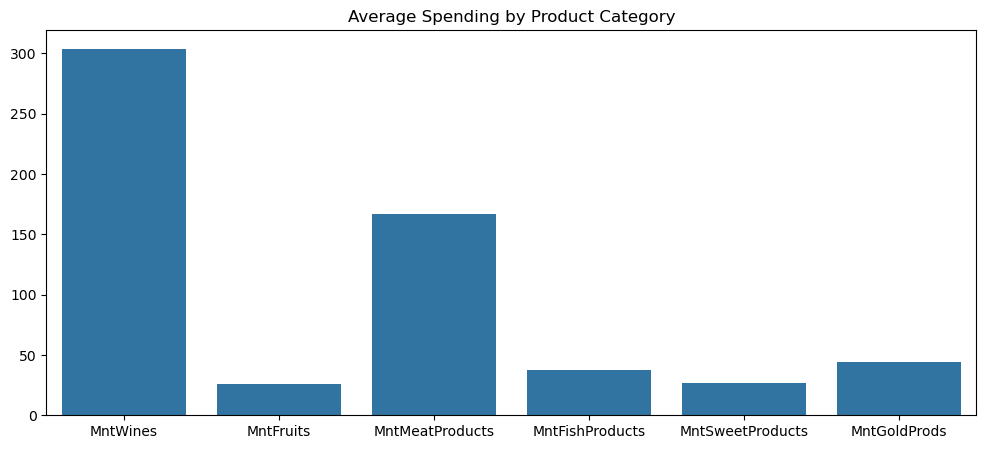

In [23]:
spending_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

plt.figure(figsize=(12,5))
sns.barplot(x=spending_cols, y=df[spending_cols].mean().values)
plt.title("Average Spending by Product Category")
plt.show()

### Correlation Analysis

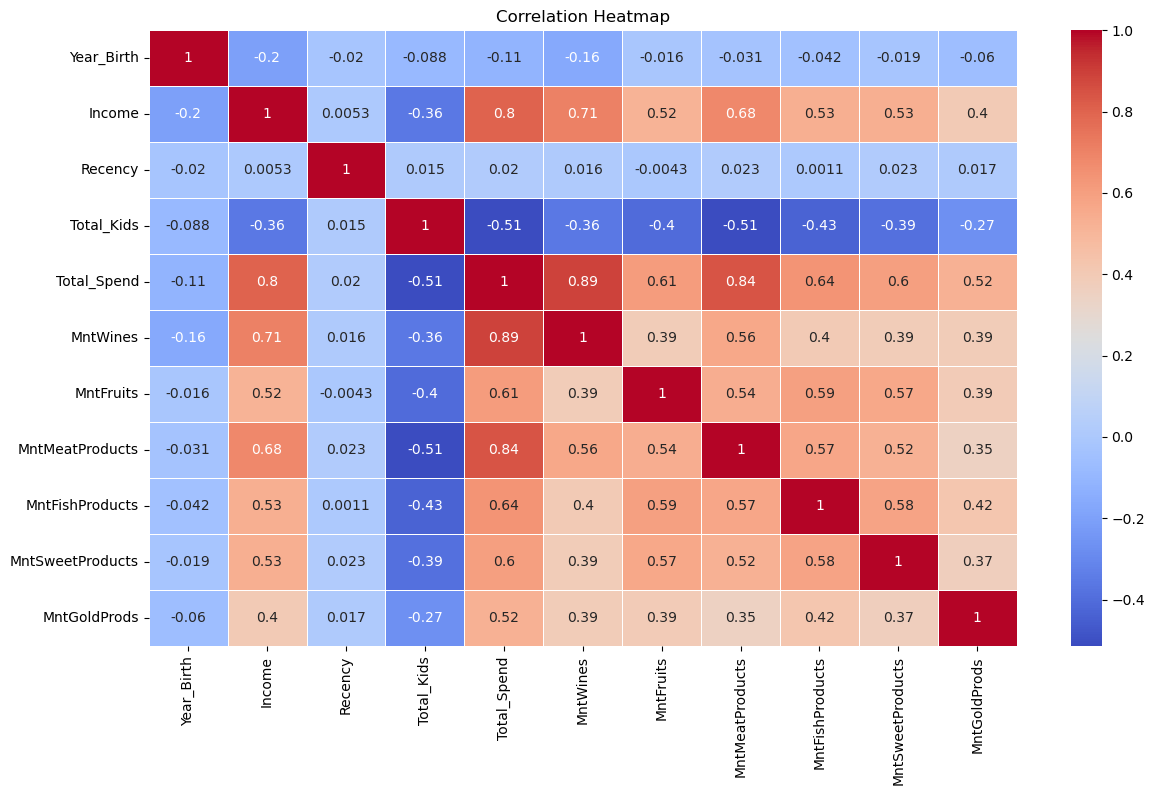

In [24]:
corr = df[numerical_cols + spending_cols].corr()

plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Income vs Spending

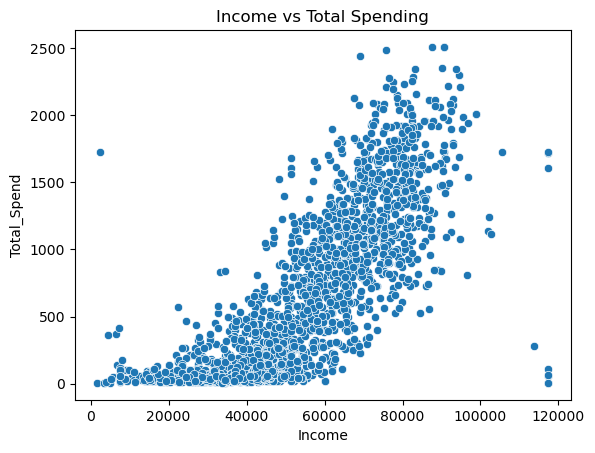

In [25]:
plt.figure()
sns.scatterplot(x='Income', y='Total_Spend', data=df)
plt.title("Income vs Total Spending")
plt.show()

### Channel Usage

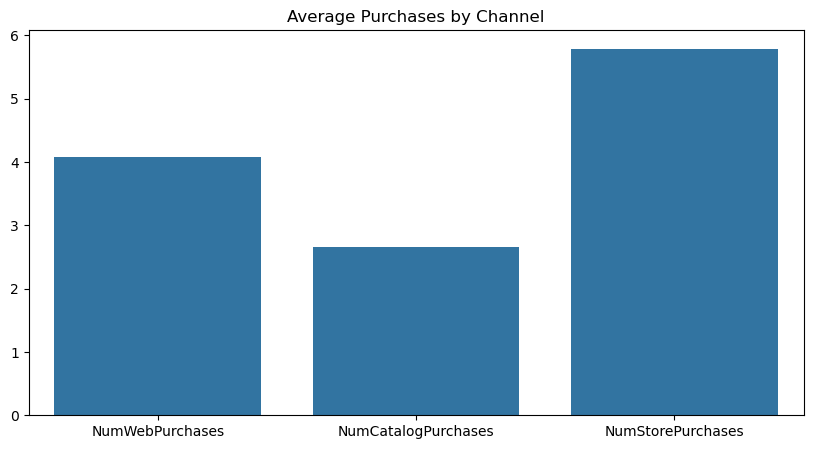

In [26]:
channels = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

plt.figure(figsize=(10,5))
sns.barplot(x=channels, y=df[channels].mean().values)
plt.title("Average Purchases by Channel")
plt.show()

### Web visits behavior

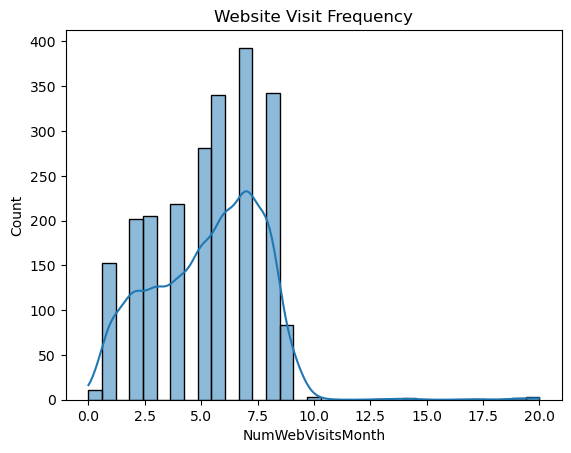

In [27]:
plt.figure()
sns.histplot(df['NumWebVisitsMonth'], kde=True)
plt.title("Website Visit Frequency")
plt.show()

### Promotion Response Analysis

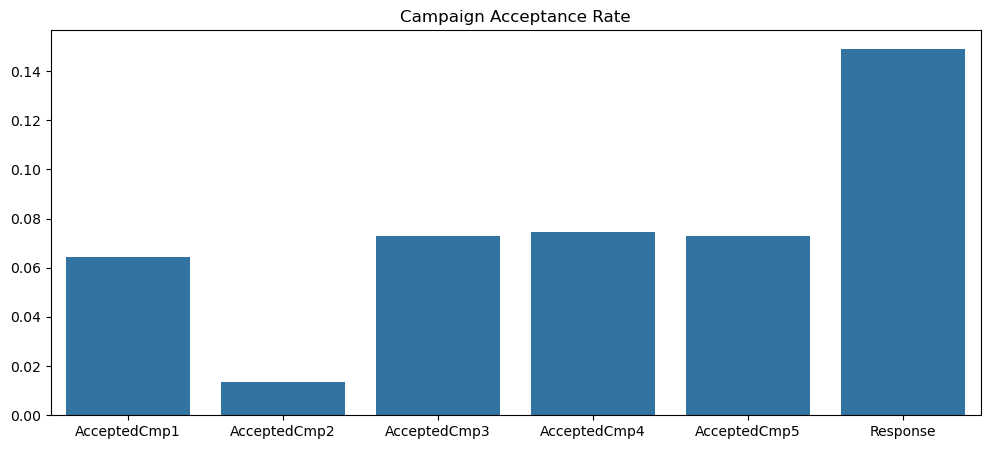

In [28]:
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']

plt.figure(figsize=(12,5))
sns.barplot(x=campaign_cols, y=df[campaign_cols].mean().values)
plt.title("Campaign Acceptance Rate")
plt.show()

### Age vs Spending

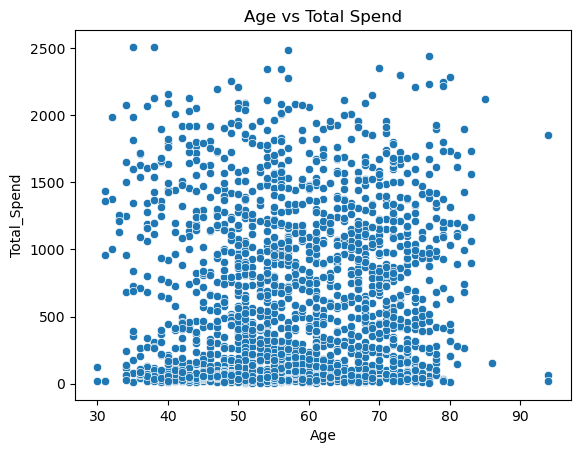

In [29]:
df['Age'] = 2026 - df['Year_Birth']
plt.figure()
sns.scatterplot(x='Age', y='Total_Spend', data=df)
plt.title("Age vs Total Spend")
plt.show()

## Model Building.

### Importing Required Libraries

In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

### Feature Preparation for Clustering

In [31]:
cluster_features = [
    'Income',
    'Recency',
    'Age',
    'Total_Kids',
    'Total_Spend',
    'Total_Purchases',
    'NumWebVisitsMonth'
]

categorical_features = ['Education','Marital_Status']

In [32]:
# combining for pipeline
all_features = cluster_features + categorical_features

df_cluster = df[all_features].copy()

Inference:  Selected relevant numerical and categorical variables required for clustering customer behavior. Combined both sets into a new dataframe for modeling.

### Encoding Categoricals

In [33]:
# using OneHotEncoder for proper clustering
ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'  # keep numerical features as is
)

X = ct.fit_transform(df_cluster)

Inference: Used OneHotEncoder to convert categorical variables (Education and Marital_Status) into numerical dummy variables suitable for clustering algorithms. Numerical features were kept unchanged using remainder='passthrough'.

### Scaling Data

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Inference:
Scaling ensures features contribute equally to clustering, especially when ranges differ (Income > Visits).

### Optional PCA for Visualization & Noise Reduction

In [35]:
pca = PCA(n_components=0.85, random_state=42)
X_pca = pca.fit_transform(X_scaled)

Inference:
PCA simplifies visualization by projecting customers into a 2D space, making cluster patterns easier to interpret.

### Elbow Method (K-Means)

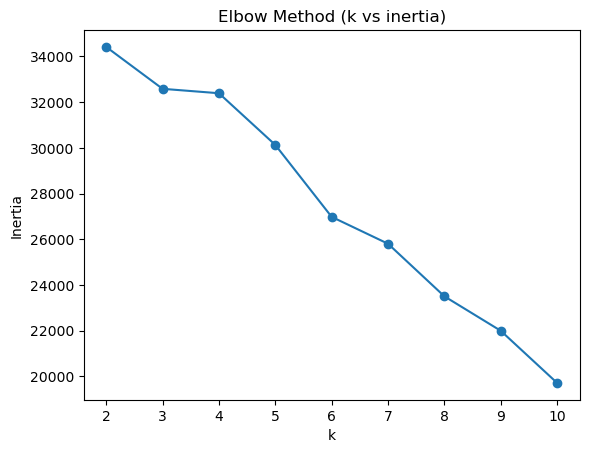

In [36]:
inertia_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_scores.append(kmeans.inertia_)

plt.figure()
plt.plot(K, inertia_scores, '-o')
plt.title("Elbow Method (k vs inertia)")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

Inference:
Elbow plot helps estimate optimal number of clusters. K≈4 appears reasonable balance.

### Fit Final K-Means (Choose k=4 as example)

In [37]:
k = 4   # can adjust after elbow visualization
kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
df['Cluster_KMeans'] = kmeans.fit_predict(X_pca)

Inference:
K-Means assigns each customer to one of four segments based on similarity.

### Silhouette + Davies-Bouldin Evaluation

In [38]:
sil_kmeans = silhouette_score(X_pca, df['Cluster_KMeans'])
db_kmeans = davies_bouldin_score(X_pca, df['Cluster_KMeans'])

print("K-Means Silhouette Score:", sil_kmeans)
print("K-Means Davies-Bouldin Score:", db_kmeans)

K-Means Silhouette Score: 0.18311007834050022
K-Means Davies-Bouldin Score: 1.4349111453990682


### Plot Clusters (Using PCA)

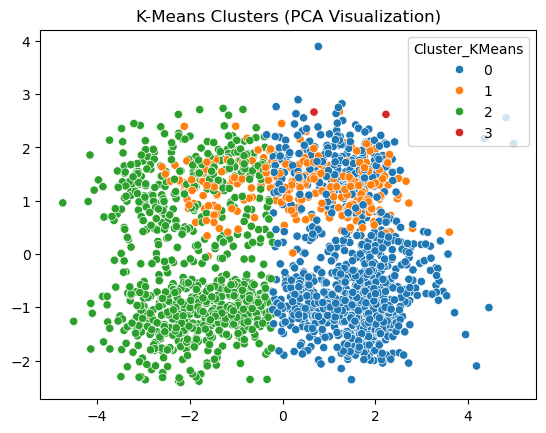

In [39]:
plt.figure()
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster_KMeans'], palette='tab10')
plt.title("K-Means Clusters (PCA Visualization)")
plt.show()

Graph Interpretation:
Clusters appear overlapping with weak boundaries. Indicates customer behavior is not strictly separable.

### Hierarchical Clustering (Agglomerative)

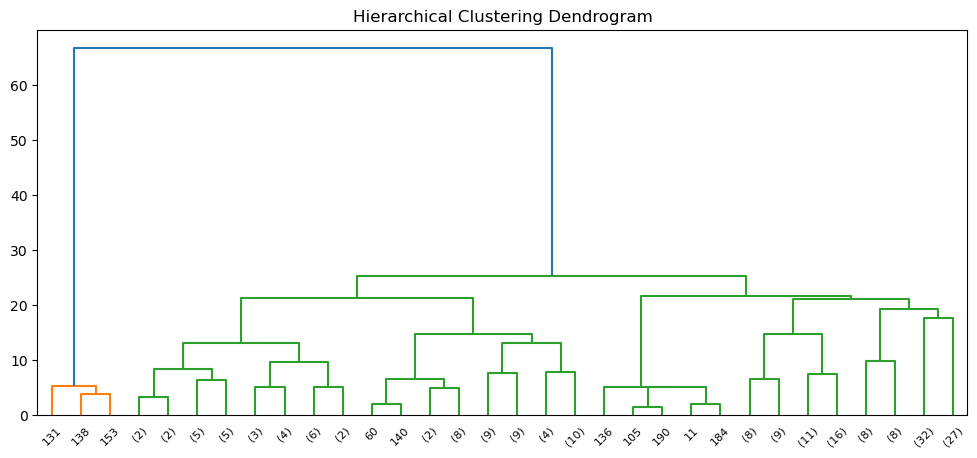

In [40]:
agg = AgglomerativeClustering(n_clusters=4)
df['Cluster_HC'] = agg.fit_predict(X_pca)

# Dendrogram (for hierarchical structure)
plt.figure(figsize=(12, 5))
linked = linkage(X_scaled[:200], method='ward')   # using subset for readability
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

Graph Interpretation:
Hierarchical shows similar overlap but slightly clearer grouping compared to K-Means.

Inference:
Hierarchical clustering forms clusters based on nested distance relationships.

## Evaluation

In [41]:
sil_hc = silhouette_score(X_pca, df['Cluster_HC'])
db_hc = davies_bouldin_score(X_pca, df['Cluster_HC'])

print("Hierarchical Silhouette Score:", sil_hc)
print("Hierarchical Davies-Bouldin Score:", db_hc)

Hierarchical Silhouette Score: 0.19663739225933533
Hierarchical Davies-Bouldin Score: 2.136837732869075


### Compare Models

In [42]:
print("\n=== MODEL COMPARISON ===")
print("K-Means     | Silhouette:", sil_kmeans, "| DB:", db_kmeans)
print("Hierarchical| Silhouette:", sil_hc,     "| DB:", db_hc)


=== MODEL COMPARISON ===
K-Means     | Silhouette: 0.18311007834050022 | DB: 1.4349111453990682
Hierarchical| Silhouette: 0.19663739225933533 | DB: 2.136837732869075


Inference:
Scores indicate weak but meaningful separation. Hierarchical slightly outperforms K-Means.

Inference:
Hierarchical clustering performs slightly better than K-Means because it captures smaller distance-based differences between customers. Scores indicate weak separability, which is common in real-world marketing datasets due to overlapping customer behavior.

# Model Deployment 

In [43]:
import joblib

joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(ct, 'encoder.pkl')

['encoder.pkl']

In [44]:
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

In [45]:
df.groupby('Cluster_KMeans')[[
    'Income',
    'Total_Spend',
    'Total_Purchases',
    'NumWebVisitsMonth',
    'Age',
    'Total_Kids'
]].mean()

,Income,Total_Spend,Total_Purchases,NumWebVisitsMonth,Age,Total_Kids
Cluster_KMeans,,,,,,
0,36583.691866,163.686124,7.272727,6.623923,55.143541,1.244976
1,48107.458202,426.003155,11.189274,5.671924,59.246057,1.135647
2,71506.479714,1200.092429,19.322286,3.622857,58.795429,0.498857
3,43789.000000,256.666667,9.666667,6.333333,53.000000,1.666667
